# Dissolve testing - dissolve by HUC
This notebook will be used to test the dissolve function in geopandas to map indices by HUC 2, 4, and 8. 

In [1]:
import pandas as pd, geopandas as gp, matplotlib.pyplot as plt, matplotlib as mpl, numpy as np
from shapely import wkt

In [2]:
# Read in extracted_HUC1019 file
test_1019 = pd.read_csv('extracted1019_segGeo.csv')
# test_1019.columns
test_1019.Coordinates = test_1019.Coordinates.astype(str)
test_1019['Coordinates'] = test_1019['Coordinates'].apply(wkt.loads)
test_1019Geo = gp.GeoDataFrame(test_1019, geometry='Coordinates')
test =  pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/extracted_HUC1019.csv')
test.columns

test.Coordinates = test.Coordinates.astype(str)
test['Coordinates'] = test['Coordinates'].apply(wkt.loads)
testGeo = gp.GeoDataFrame(test, geometry='Coordinates')
test.REACHCODE

0        1019.0
1        1019.0
2        1019.0
3        1019.0
4        1019.0
          ...  
14842    1019.0
14843    1019.0
14844    1019.0
14845    1019.0
14846    1019.0
Name: REACHCODE, Length: 14847, dtype: float64

<AxesSubplot:>

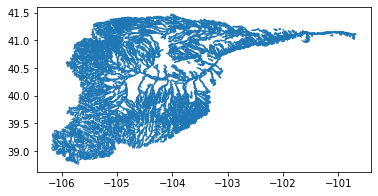

In [3]:
var = 'Hydroseq'
# test_1019Geo.plot(column=var, legend=True, cmap='viridis_r',
# legend_kwds={'label': var, 'orientation': "horizontal"}, vmin=0, vmax=4)
test_1019Geo.plot()

<AxesSubplot:>

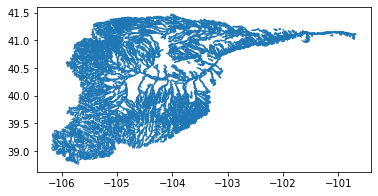

In [4]:
testGeo.plot()

In [5]:
test_1019Geo.columns

Index(['Hydroseq', 'geometry', 'DamID', 'Coordinates', 'LENGTHKM', 'StartFlag',
       'UpHydroseq', 'DnHydroseq', 'QC_MA', 'Norm_stor', 'DamCount'],
      dtype='object')

<AxesSubplot:>

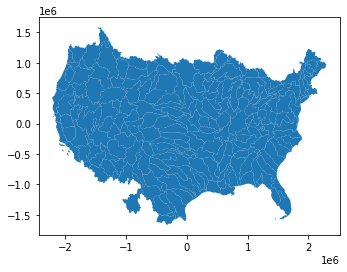

In [6]:
# Read in a HUC
huc4 = gp.read_file("hucs_to_test/HUC4_CONUS.shp") 
huc4.plot()

In [7]:
huc4.columns
huc4.head

<bound method NDFrame.head of      OBJECTID                                   TNMID MetaSource SourceData  \
0           1  {2A116CC4-4E9B-493F-B689-EE0CC70C00DE}       None       None   
1           2  {567B48C4-0554-419E-9998-BFCAF8F57203}       None       None   
2           3  {AAB11E45-75A7-47FE-85F1-AB3621CD80BD}       None       None   
3           4  {3FD8D82E-B3BD-4F21-83A7-7790925B4515}       None       None   
4           5  {DBA88F79-FFAD-4064-939E-8A507A8641E0}       None       None   
..        ...                                     ...        ...        ...   
215        14  {E3A2BA98-7EAC-4EC8-8FBA-65AA95D408FA}       None       None   
216        15  {3F7BF113-6CB0-44FC-9207-4072115F6F0D}       None       None   
217        16  {71920690-7DEA-4A19-92AA-19235D39195A}       None       None   
218        17  {0FEA7801-C224-48D0-B140-0F9E95228043}       None       None   
219        18  {75D0D6E6-AAA0-42A3-9206-29547A7BB2AF}       None       None   

    SourceOrig Source

<AxesSubplot:>

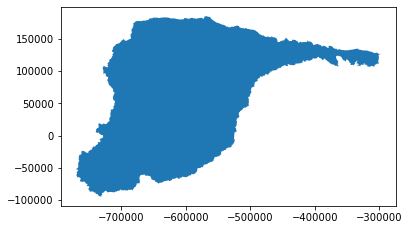

In [8]:
huc1019 = huc4[huc4['HUC4'] == '1019']
huc1019.plot()

In [9]:
huc1019.crs
print(testGeo.crs)

None


In [10]:
# huc1019 = int(huc1019['HUC4'])
# huc1019['HUC4']

In [11]:
test['HUC2'] = test['REACHCODE']/10**2#convert Reachcode to HUC 2 format
test['HUC4'] = test['REACHCODE'] #add column with HUC 4
# test['HUC2'] = test['REACHCODE'][:2] #convert Reachcode to HUC 2 format
# flowlines['REACHCODE'] = flowlines['REACHCODE']/(10**10) #convert Reachcode to HUC 4 format
test['HUC2'] = test['HUC2'].apply(np.floor) #round down to integer
test['HUC2']

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
14842    10.0
14843    10.0
14844    10.0
14845    10.0
14846    10.0
Name: HUC2, Length: 14847, dtype: float64

In [12]:
# huc4 = int(huc4['HUC4'][:])
# df_w_polygon = pd.merge(test, huc4, left_on = 'REACHCODE', right_on = 'HUC4', how = 'left')
# df_w_polygon = pd.concat([test, huc1019])
# df_w_polygon



In [13]:
test.columns
test_1019.columns

Index(['Hydroseq', 'geometry', 'DamID', 'Coordinates', 'LENGTHKM', 'StartFlag',
       'UpHydroseq', 'DnHydroseq', 'QC_MA', 'Norm_stor', 'DamCount'],
      dtype='object')

# Trying workflow with Red

In [14]:
# 1. Read in Red csv
Red_seg = pd.read_csv('Red_segGeo.csv')
Red_flow =  pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/Red.csv', usecols=['Hydroseq', 'REACHCODE', 'HUC2', 'HUC4', 'HUC8'])
Red_flow = Red_flow.rename(columns={'HUC2': 'HUC2_no', 'HUC4': 'HUC4_no', 'HUC8': 'HUC8_no'})
Red_merge = pd.merge(Red_seg, Red_flow, on = 'Hydroseq', how = 'left', left_index = True)
Red_merge.columns

Index(['Unnamed: 0', 'Hydroseq', 'DamID', 'Coordinates', 'LENGTHKM',
       'StartFlag', 'UpHydroseq', 'DnHydroseq', 'QC_MA', 'Norm_stor',
       'DamCount', 'Frag_Index', 'Norm_stor_up', 'upstream_count',
       'LENGTHKM_up', 'DamCount_up', 'DOR', 'avg_LengthUp', 'dci', 'REACHCODE',
       'HUC2_no', 'HUC4_no', 'HUC8_no'],
      dtype='object')

In [15]:
Red_merge['dci'].unique()

array([nan])

In [16]:
# 2. Group by the HUCs
dor_test = Red_merge.groupby('HUC4_no')['DOR'].mean()
dor_test
# fragments0 = segments.pivot_table(values=['LENGTHKM', 'DamCount', 'Norm_stor'], index='Frag', aggfunc=sum)

HUC4_no
901.0    0.083127
902.0    0.128005
903.0    0.019078
904.0    0.005466
Name: DOR, dtype: float64

In [17]:
# huc4['DOR'] = huc4['HUC4']
# dor_merge = pd.merge(huc4, dor_test, left_on = 'HUC4_no', right_on = 'HUC4', how = 'left')
huc4 = huc4.join(dor_test, on = 'HUC4_no', how = 'left', lsuffix='_left', rsuffix='_right')
# type(dor_merge)

<AxesSubplot:>

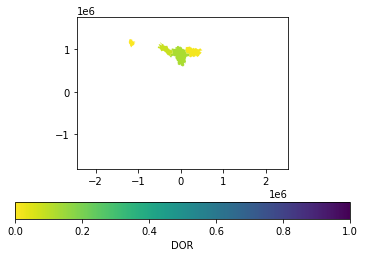

In [18]:
# dor_merge.columns

# var = "DOR_y"
# # dor_mergeGeo[var] = dor_merge_up[var]
# # dor_merge.plot()
# dor_merge.plot(column=var, legend=True, cmap='viridis_r',
#                  legend_kwds={'label': var, 'orientation': "horizontal"},
#                  vmin=0, vmax=1)



var = "DOR"
# dor_mergeGeo[var] = dor_merge_up[var]
# dor_merge.plot()
huc4.plot(column=var, legend=True, cmap='viridis_r',
                 legend_kwds={'label': var, 'orientation': "horizontal"},
                 vmin=0, vmax=1)

In [19]:
huc4.columns

Index(['OBJECTID', 'TNMID', 'MetaSource', 'SourceData', 'SourceOrig',
       'SourceFeat', 'LoadDate', 'AreaSqKm', 'AreaAcres', 'GNIS_ID', 'Name',
       'States', 'HUC4', 'Shape_Leng', 'Shape_Area', 'layer', 'path',
       'HUC4_no', 'geometry', 'DOR'],
      dtype='object')

# General workflow for all basins

In [20]:
basin_ls = ['California', 'Colorado', 'Columbia', 'Great Basin', 'Great Lakes','Gulf Coast', 'Mississippi', 'North Atlantic', 'Red', 'Rio Grande','South Atlantic']
# for basin in basin_ls:
    
#     segGeo = pd.read_csv(basin+'_segGeo.csv')
#     flowlines = pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/'+basin+'.csv', usecols=['Hydroseq', 'REACHCODE', 'HUC2', 'HUC4', 'HUC8'])
#     flowlines = flowlines.rename(columns={'HUC2': 'HUC2_no', 'HUC4': 'HUC4_no', 'HUC8': 'HUC8_no'})
#     merge = pd.merge(segGeo, flowlines, on = 'Hydroseq', how = 'left', left_index = True)
    
#     indices_by_huc4 = merge.pivot_table(values = ['DOR', 'avg_LengthUp'], index='HUC4_no', aggfunc=np.mean)
# #     fragments0 = segments.pivot_table(values=['LENGTHKM', 'DamCount', 'Norm_stor'], index='Frag', aggfunc=sum)
    
#     huc4 = huc4.join(indices_by_huc4, on = 'HUC4_no', how = 'left', lsuffix='_left', rsuffix='_right')

import os
import glob
import pandas as pd
os.chdir("/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/")

extension = '.csv'
all_flowlines = [i+extension for i in basin_ls]
# all_flowlines

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_flowlines ])

#export to csv
combined_csv.to_csv("combined_flowlines.csv", index=False, encoding='utf-8-sig')


# Seg Geos
extension = '_segGeo.csv'
all_segGeos = [i+extension for i in basin_ls]
# all_segGeos

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_segGeos])

#export to csv
combined_csv.to_csv("combined_segGeo.csv", index=False, encoding='utf-8-sig')

/Users/rachelspinti/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2,9,10,11,12,13,14,15,17,18,19,20,21,22,28,29,30,31,33,34,35,36,45,46,47,51,52,53,54,56,60) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [21]:
huc4.columns

Index(['OBJECTID', 'TNMID', 'MetaSource', 'SourceData', 'SourceOrig',
       'SourceFeat', 'LoadDate', 'AreaSqKm', 'AreaAcres', 'GNIS_ID', 'Name',
       'States', 'HUC4', 'Shape_Leng', 'Shape_Area', 'layer', 'path',
       'HUC4_no', 'geometry', 'DOR'],
      dtype='object')

In [22]:
segGeo = pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/combined_segGeo.csv')
flowlines = pd.read_csv('/Users/rachelspinti/Documents/River_bifurcation/all_basins_unfiltered_workflow/combined_flowlines.csv', usecols=['Hydroseq', 'REACHCODE', 'HUC2', 'HUC4', 'HUC8'])
flowlines = flowlines.rename(columns={'HUC2': 'HUC2_no', 'HUC4': 'HUC4_no', 'HUC8': 'HUC8_no'})
merge = pd.merge(segGeo, flowlines, on = 'Hydroseq', how = 'left', left_index = True)
    
indices_by_huc4 = merge.pivot_table(values = ['DOR', 'avg_LengthUp'], index='HUC4_no', aggfunc=np.mean)
#     fragments0 = segments.pivot_table(values=['LENGTHKM', 'DamCount', 'Norm_stor'], index='Frag', aggfunc=sum)
    
huc4 = huc4.join(indices_by_huc4, on = 'HUC4_no', how = 'left', lsuffix='_left', rsuffix='_right')

<AxesSubplot:>

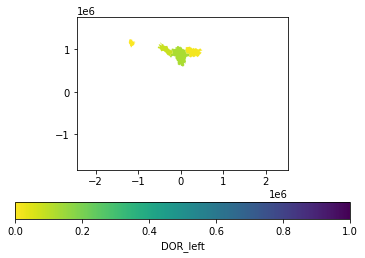

In [28]:
var = "DOR_left"
# dor_mergeGeo[var] = dor_merge_up[var]
# dor_merge.plot()
huc4.plot(column=var, legend=True, cmap='viridis_r',
                 legend_kwds={'label': var, 'orientation': "horizontal"},
                 vmin=0, vmax=1)

In [25]:
huc4.columns

Index(['OBJECTID', 'TNMID', 'MetaSource', 'SourceData', 'SourceOrig',
       'SourceFeat', 'LoadDate', 'AreaSqKm', 'AreaAcres', 'GNIS_ID', 'Name',
       'States', 'HUC4', 'Shape_Leng', 'Shape_Area', 'layer', 'path',
       'HUC4_no', 'geometry', 'DOR_left', 'DOR_right', 'avg_LengthUp'],
      dtype='object')

<AxesSubplot:>

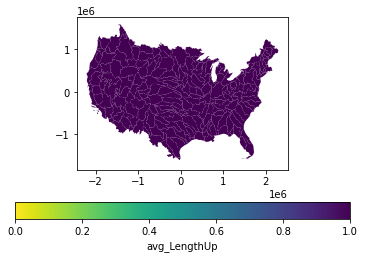

In [27]:
var = "avg_LengthUp"
# dor_mergeGeo[var] = dor_merge_up[var]
# dor_merge.plot()
huc4.plot(column=var, legend=True, cmap='viridis_r',
                 legend_kwds={'label': var, 'orientation': "horizontal"},
                 vmin=0, vmax=1)